### MNIST form scratch

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def RelU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = RelU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1,Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def relu_derivative(Z):
    return Z > 0 

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * relu_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [6]:
import pickle as pkl
def save_model(W1, b1, W2, b2, filename):
    model_params = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    with open(filename, 'wb') as file:
        pkl.dump(model_params, file)
    print(f"Model saved to {filename}")

In [7]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_decent(X, Y, iteration, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iteration):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2),Y))
    return W1, b1, W2, b2

        

In [8]:
W1, b1, W2, b2 = gradient_decent(X_train, Y_train, 10000, 0.01)


Iteration:  0
[7 8 5 ... 5 5 8] [7 9 8 ... 3 2 5]
Accuracy:  0.07548780487804878
Iteration:  10
[7 8 5 ... 5 5 8] [7 9 8 ... 3 2 5]
Accuracy:  0.09570731707317073
Iteration:  20
[7 8 5 ... 5 5 8] [7 9 8 ... 3 2 5]
Accuracy:  0.12019512195121951
Iteration:  30
[7 8 5 ... 5 5 8] [7 9 8 ... 3 2 5]
Accuracy:  0.14321951219512194
Iteration:  40
[7 8 5 ... 5 0 8] [7 9 8 ... 3 2 5]
Accuracy:  0.15960975609756098
Iteration:  50
[7 8 5 ... 5 0 8] [7 9 8 ... 3 2 5]
Accuracy:  0.17517073170731706
Iteration:  60
[7 8 5 ... 5 0 8] [7 9 8 ... 3 2 5]
Accuracy:  0.18765853658536585
Iteration:  70
[7 8 5 ... 3 0 8] [7 9 8 ... 3 2 5]
Accuracy:  0.19897560975609757
Iteration:  80
[7 8 5 ... 3 0 8] [7 9 8 ... 3 2 5]
Accuracy:  0.209
Iteration:  90
[7 8 5 ... 3 0 8] [7 9 8 ... 3 2 5]
Accuracy:  0.219
Iteration:  100
[7 8 5 ... 3 0 8] [7 9 8 ... 3 2 5]
Accuracy:  0.22841463414634147
Iteration:  110
[7 8 5 ... 3 0 8] [7 9 8 ... 3 2 5]
Accuracy:  0.23636585365853657
Iteration:  120
[7 8 5 ... 3 0 8] [7 9 8 ..

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [10]:
save_model(W1, b1, W2, b2, './Models/GD_MNSIT_10000.pkl')

Model saved to ./Models/GD_MNSIT_10000.pkl


Prediction:  [7]
Label:  7


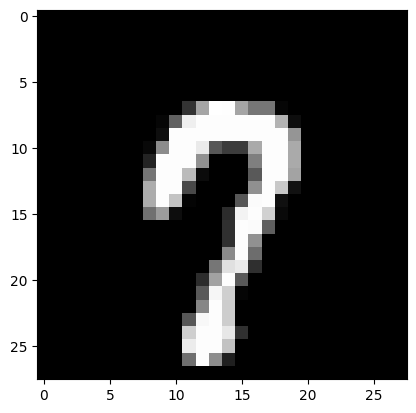

In [11]:
test_prediction(0, W1, b1, W2, b2)
# test_prediction(1, W1, b1, W2, b2)
# test_prediction(2, W1, b1, W2, b2)
# test_prediction(3, W1, b1, W2, b2)

In [12]:
def load_model(filename):
    with open(filename, 'rb') as file:
        model_params = pkl.load(file)
    W1 = model_params['W1']
    b1 = model_params['b1']
    W2 = model_params['W2']
    b2 = model_params['b2']
    print(f"Model loaded from {filename}")
    return W1, b1, W2, b2

In [13]:
W1, b1, W2, b2 = load_model('./Models/GD_MNSIT_10000.pkl')

Model loaded from ./Models/GD_MNSIT_10000.pkl


Prediction:  [9]
Label:  9


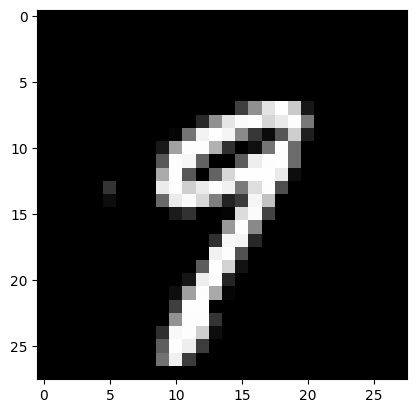

In [34]:
test_prediction(392, W1, b1, W2, b2)